In [1]:
# Cell 1: Import libraries + load the dataset
import pandas as pd
import numpy as np

# Update this path if needed
DATA_PATH = "flood.csv"

df = pd.read_csv(DATA_PATH)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()


Shape: (50000, 21)
Columns: ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [2]:
# Cell 2: Quick structural check (dtypes, missing values, duplicates)
print("Data types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

print("\nDuplicate rows:", df.duplicated().sum())


Data types:
MonsoonIntensity                     int64
TopographyDrainage                   int64
RiverManagement                      int64
Deforestation                        int64
Urbanization                         int64
ClimateChange                        int64
DamsQuality                          int64
Siltation                            int64
AgriculturalPractices                int64
Encroachments                        int64
IneffectiveDisasterPreparedness      int64
DrainageSystems                      int64
CoastalVulnerability                 int64
Landslides                           int64
Watersheds                           int64
DeterioratingInfrastructure          int64
PopulationScore                      int64
WetlandLoss                          int64
InadequatePlanning                   int64
PoliticalFactors                     int64
FloodProbability                   float64
dtype: object

Missing values per column:
MonsoonIntensity                   0
Topogr

In [3]:
# Cell 3: Basic cleaning (drop duplicates, standardize column names, sanity checks)
# 1) Drop duplicate rows (if any)
df = df.drop_duplicates().reset_index(drop=True)

# 2) Standardize column names (trim spaces; keep original style but safer)
df.columns = [c.strip() for c in df.columns]

# 3) Ensure target column exists
TARGET_COL = "FloodProbability"
assert TARGET_COL in df.columns, f"Target column '{TARGET_COL}' not found!"

print("After cleaning shape:", df.shape)


After cleaning shape: (50000, 21)


In [4]:
# Cell 4: Validate numeric columns
# Convert everything to numeric where possible (non-convertible becomes NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Re-check missing values after coercion
missing_after = df.isna().sum().sum()
print("Total missing after numeric coercion:", missing_after)

# If any NaNs appeared, decide a strategy (here: drop rows with NaN)
if missing_after > 0:
    df = df.dropna().reset_index(drop=True)
    print("Dropped rows with NaN. New shape:", df.shape)


Total missing after numeric coercion: 0


In [5]:
# Cell 5: Outlier Detection & Removal using IQR Method

# We will apply IQR method column-wise and remove rows containing outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows where ALL values are within bounds
df_before = df.shape[0]

df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)].reset_index(drop=True)

df_after = df.shape[0]

print("Rows before outlier removal:", df_before)
print("Rows after outlier removal:", df_after)
print("Number of rows removed:", df_before - df_after)


Rows before outlier removal: 50000
Rows after outlier removal: 37791
Number of rows removed: 12209


In [6]:
# Final check after preprocessing

print("Final dataset shape after preprocessing:", df.shape)

print("\nNumber of features (including target):", df.shape[1])
print("Number of samples:", df.shape[0])

df.head()


Final dataset shape after preprocessing: (37791, 21)

Number of features (including target): 21
Number of samples: 37791


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [7]:
# Cell 8: Descriptive Statistics

print("Descriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,...,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000,37791.000000
mean,4.903125,4.885978,4.922865,4.910296,4.899976,4.913498,4.914927,4.888069,4.920113,4.924135,...,4.907518,4.902834,4.901776,4.890688,4.903284,4.895398,4.913286,4.905216,4.900585,0.490610
std,2.104798,2.113163,2.107599,2.087551,2.108639,2.097657,2.110405,2.102686,2.108726,2.111433,...,2.097036,2.113486,2.112648,2.098484,2.112122,2.101031,2.107678,2.104409,2.112310,0.046599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.460000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.490000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.520000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.640000


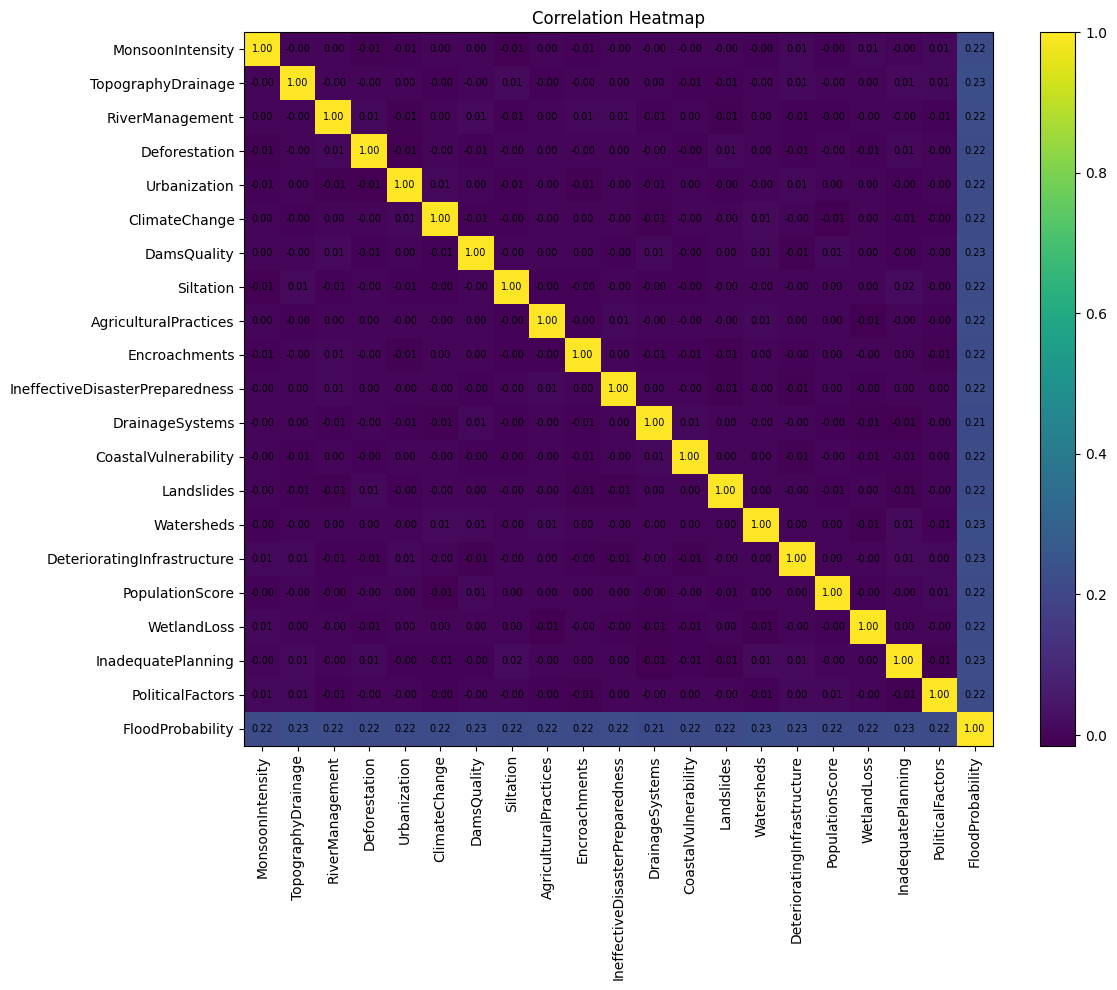

In [8]:
# Cell 9: Correlation Heatmap (annot=True)

import matplotlib.pyplot as plt

corr = df.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr, aspect="auto")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Annotate values
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha="center", va="center", fontsize=7)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


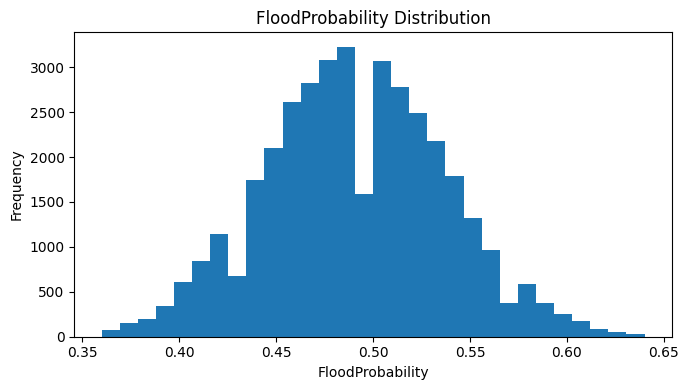

In [9]:
# Cell 10: Target Distribution

plt.figure(figsize=(7, 4))
plt.hist(df["FloodProbability"], bins=30)
plt.title("FloodProbability Distribution")
plt.xlabel("FloodProbability")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


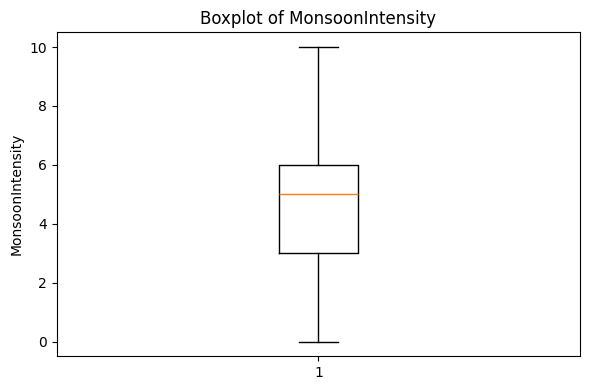

In [10]:
# Boxplot for a Single Column

import matplotlib.pyplot as plt

column_name = "MonsoonIntensity"   # change column here if needed

plt.figure(figsize=(6, 4))
plt.boxplot(df[column_name], showfliers=True)

plt.title(f"Boxplot of {column_name}")
plt.ylabel(column_name)

plt.tight_layout()
plt.show()


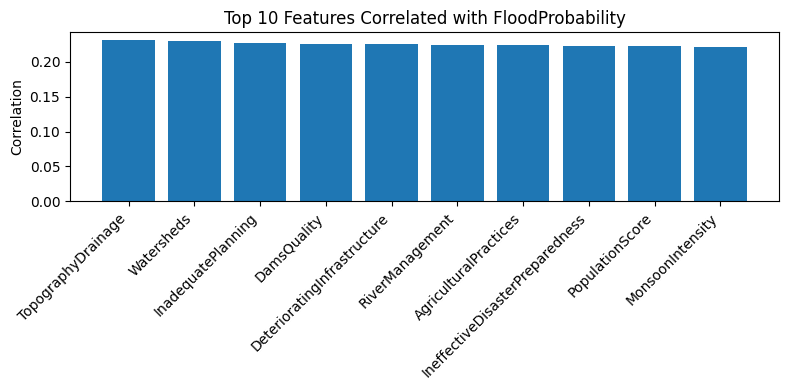

In [11]:
# Cell 12: Top 10 Correlated Features with Target

corr = df.corr()
target_corr = (
    corr["FloodProbability"]
    .drop("FloodProbability")
    .sort_values(key=lambda s: s.abs(), ascending=False)
    .head(10)
)

plt.figure(figsize=(8, 4))
plt.bar(target_corr.index, target_corr.values)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Features Correlated with FloodProbability")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1013702891.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("Urbanization_Level")["FloodProbability"].mean()


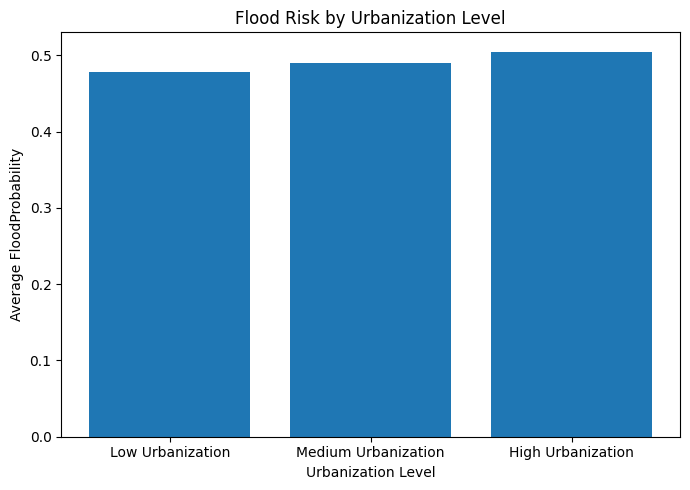

In [12]:
# Meaningful Plot: Flood Risk by Urbanization Level

import matplotlib.pyplot as plt
import pandas as pd

# Create categorical levels for Urbanization
df["Urbanization_Level"] = pd.cut(
    df["Urbanization"],
    bins=3,
    labels=["Low Urbanization", "Medium Urbanization", "High Urbanization"]
)

# Compute average FloodProbability per level
grouped = df.groupby("Urbanization_Level")["FloodProbability"].mean()

plt.figure(figsize=(7, 5))
plt.bar(grouped.index, grouped.values)

plt.xlabel("Urbanization Level")
plt.ylabel("Average FloodProbability")
plt.title("Flood Risk by Urbanization Level")

plt.tight_layout()
plt.show()
